In [12]:
#import matplotlib
import matplotlib.pyplot as mp
import numpy as np
import metpy.calc as mpc
import xarray as xr
import datetime as dt

In [71]:
#### SCRIPT TO READ IN SCAM OUTPUT AND MAKE SOME PLOTS ####
###### IOP file info. ######
#scam_file_in = './FSCAM.T42_T42.SAS.001.cam.h0.2013-06-10-43200.nc'   # input template (default: 20min tstep)
#scam_file_in = './FSCAM.T42_T42.SAS.002.cam.h0.2013-06-10-43200.nc'   # input template (5min tstep)
#scam_file_in = './FSCAM.T42_T42.SAS.003.cam.h0.2013-06-10-43200.nc'   # input template (1min tstep)
#scam_file_in = './FSCAM.T42_T42.SAS.007.cam.h0.2013-06-10-43200.nc'   # input template, fixed q for SCAM (double,kg/kg), shflx/lhflx prescribed (default: 20min tstep)
#scam_file_in = './FSCAM.T42_T42.SAS.008.cam.h0.2013-06-10-43200.nc'   # as 007, but with omega,divT and divq set to zero.
scam_file_in = './FSCAM.T42_T42.SAS.011.cam.h0.2013-06-10-43200.nc'   # as 007, but with omega,divT and divq set to zero.


scam_file_num = 11  # For detailed single case analysis
scam_file_nums = [11,12,13,14]  # For comparisons


scam_file_pre = "FSCAM.T42_T42.SAS."
scam_file_suf = ".cam.h0.2013-06-10-43200.nc"

zoffset = 6.


#### PLOTTING ####

pvars_ts1d = ['PBLH'] # D profile timeseries plots
pvars_ts2d = ['Q'] # 2D profile timeseries plots
pvars_snap = ['Q','T','TH']  # Snapshot plotting vars
tsnaps = np.array([6.,8.,10.,12.,14.,16])     # Time of snapshots (Z)

#### CONSTANTS #####

r_gas = 287.   # Specific gas constant for dry air
cp_air = 1004.6 # Specific heat for dry air
Lv = 2.501e6      # Latent heat of vaporization

r_cp = r_gas/cp_air    # r/cp
grav = 9.81     # Gravity ave.
p0 = 100000. # pref 


###### DERIVED VARS #######
scam_files_in = [ scam_file_pre+("{:0>3d}".format(x))+scam_file_suf for x in scam_file_nums]
scam_in = xr.open_dataset(scam_files_in[0],engine='netcdf4')

time = scam_in.time

#print(1000*86400*(scam_in.PRECC.values+scam_in.PRECL.values))


hour_frac = time.time.dt.hour+time.time.dt.minute/60.-zoffset

---- PLOTTING 1D TIME PLOTS ------>>>   PBL height  --amin/cmax -->  183.54053 1940.4141


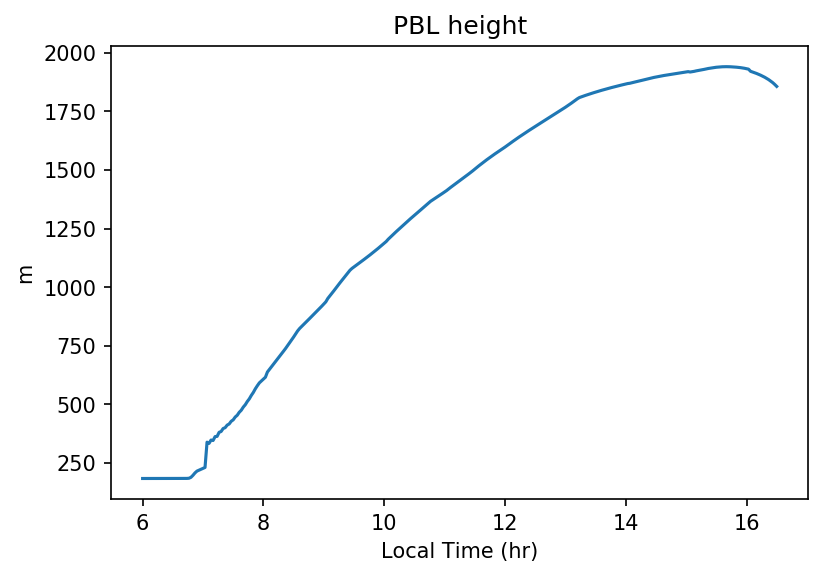

In [72]:
# Time plotting info #
## Plot Variables ##
plot1d_vars =  np.array(['LHFLX','SHFLX','TS','PBLH','PRECL','PRECC'])
cmin1d = np.array([0.,0.,290.])
cmax1d = np.array([300.,100.,310.])
vscale1d =  np.array([1.,1.,1.,86400.*1000.,86400.*1000.])


## 1D PLOTS ##

for var in pvars_ts1d:
    iv = np.where(plot1d_vars==var)
    
    pvar = scam_in[var].isel(lat=0,lon=0) 
        
    # Fig setup
    print('---- PLOTTING 1D TIME PLOTS ------>>>  ',pvar.attrs['long_name'],' --amin/cmax --> ',  np.min(pvar.values),np.max(pvar.values))
    
    # Plot
    mp.plot(hour_frac,pvar)
    mp.rcParams['figure.dpi'] = 150
    
    # Axes stuff
    mp.xlabel("Local Time (hr)")
    mp.ylabel(pvar.attrs['units'])
    mp.title(pvar.attrs['long_name'])
    
    mp.show()

---- PLOTTING 2D TIME/HEIGHT PLOTS------>>>   Specific humidity  --amin/cmax -->  1e-12 0.016965464
[ 1.    1.95  2.9   3.85  4.8   5.75  6.7   7.65  8.6   9.55 10.5  11.45
 12.4  13.35 14.3  15.25 16.2  17.15 18.1  19.05]


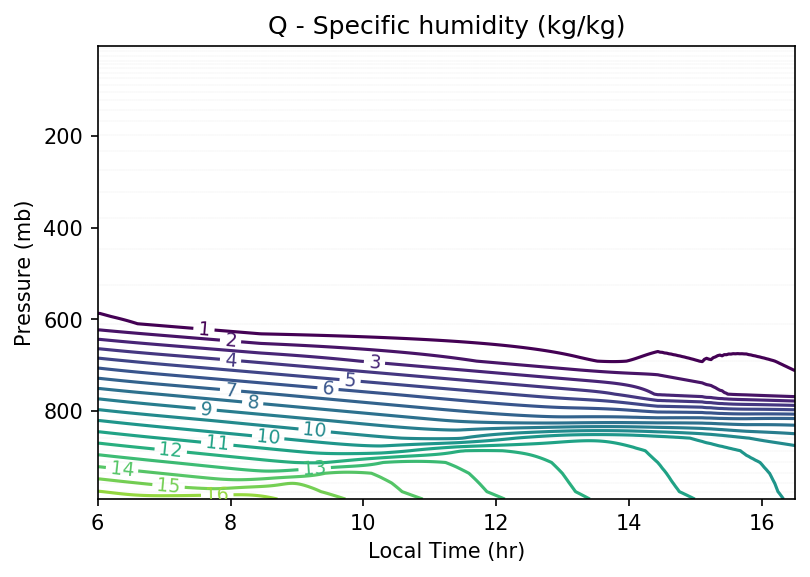

In [73]:
# Time/Height Plotting info.

plot2d_vars = np.array(['T','RELHUM','CLOUD','Q','WPRTP_CLUBB','WPTHLP_CLUBB','WP3_CLUBB','STEND_CLUBB','RVMTEND_CLUBB','DCQ','THL'])
cmin = np.array([190.,10.,  0., 1., 0,    0,-1,-0.5,-20,-5])
cmax = np.array([310.,120.,100.,20.,200.,200,1.,0.55,20,5])

vscale =  np.array([1.,1.,100.,1000.,1.,1.,1.,1.,1000.*86400,1000.*86400])

nlevs = 20 # Number of contour levels
vplevs = scam_in['lev'].transpose()

## TIME/HEIGHT PLOTTING ##

for var in pvars_ts2d:
    iv = np.where(plot2d_vars==var) 
    
    pvar = scam_in[var].isel(lat=0,lon=0).transpose()  
    
    print('---- PLOTTING 2D TIME/HEIGHT PLOTS------>>>  ',pvar.attrs['long_name'],' --amin/cmax --> ',  np.min(pvar.values),np.max(pvar.values))
    plevels = np.arange(cmin[iv],cmax[iv],(cmax[iv]-cmin[iv])/nlevs)

    fig,ax = mp.subplots()
    mp.rcParams['figure.dpi'] = 150
    p_tp = ax.contour(hour_frac,scam_in[pvar.dims[0]],vscale[iv]*pvar,levels=plevels)
    ax.invert_yaxis()
    mp.clabel(p_tp, fontsize=9, inline=1,fmt='%1.0f')
    mp.hlines(scam_in[pvar.dims[0]], min(hour_frac), max(hour_frac), linestyle="dotted",lw=0.04)
    ax.set_xlabel("Local Time (hr)")
    ax.set_ylabel("Pressure (mb)")
    Richard
    ax.set_title(var+" - "+pvar.attrs['long_name']+" ("+pvar.attrs['units']+")")

------ SNAPSHOTS ------>>>   Q  ---  Specific humidity  -- min/max -->  1e-12 0.016965464
(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31]),)
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
<xarray.DataArray 'lev' (lev: 32)>
array([  3.643466,   7.59482 ,  14.356632,  24.61222 ,  35.92325 ,  43.19375 ,
        51.677499,  61.520498,  73.750958,  87.82123 , 103.317127, 121.547241,
       142.994039, 168.22508 , 197.908087, 232.828619, 273.910817, 322.241902,
       379.100904, 445.992574, 524.687175, 609.778695, 691.38943 , 763.404481,
       820.858369, 859.534767, 887.020249, 912.644547, 936.198398, 957.48548 ,
       976.325407, 992.556095])
Coordinates:
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Attributes:
    long_name:      hybrid level at midpoints (1000*(A+B))
    units:          hPa
    positive:       down
    standard_name:  atmosphere_hybrid_sigma_pressure_coordinat

TypeError: only integer scalar arrays can be converted to a scalar index

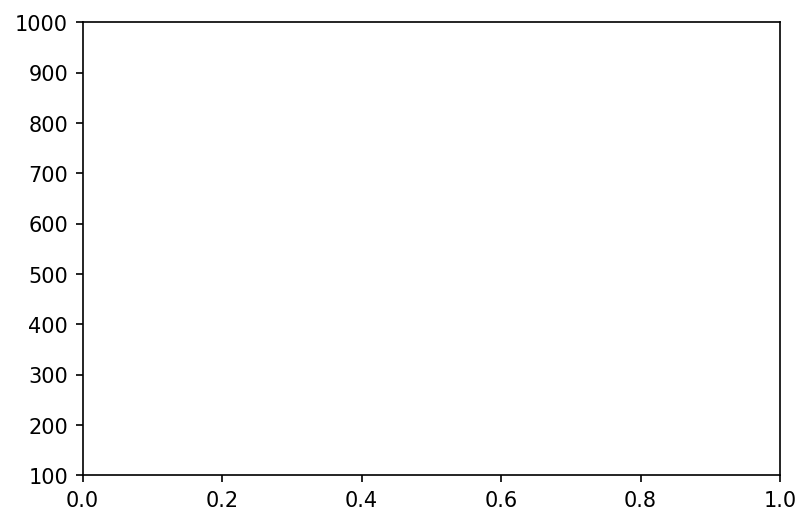

In [109]:
# Snapshots on same plot

ntsnaps = tsnaps.size

## Loop Variables ##
for var in pvars_snap:
    iv = np.where(plot2d_vars==var)
    
    if var =='TH': pvar = scam_in['T'].isel(lat=0,lon=0)*(0.01*p0/vplevs)**r_cp ; pvar.attrs['long_name'] = "Potential Temperature"
    
    try:  # Set pvar if not already.
        pvar
    except NameError:
        pvar = scam_in[var].isel(lat=0,lon=0)
    
    print('------ SNAPSHOTS ------>>>  ',var,' --- ',pvar.attrs['long_name'],' -- min/max --> ',  np.min(pvar.values),np.max(pvar.values))

# Plot several different functions...
    
    labelspacing = []
    labels = []

# Level ranges 
    pptop = 100.
    ipplevs = np.where(vplevs>=pptop)
    ip0 = min(ipplevs)
    ip1 = max(ipplevs)
    print(ipplevs)
    print(ip0)
        
    ## Loop times ##
    
    for ii in range(0, ntsnaps):
        itt = min(np.where(hour_frac==tsnaps[ii]))
        mp.ylim(100,1000)
        print(scam_in[pvar.dims[1]])
        mp.plot(np.flip(pvar[itt[0],ip0:ip1]),vplevs[ip0:ip1])
        
        if var not in ['T','TH','THL']: mp.vlines(0, 0, scam_in[pvar.dims[1]].max(), linestyle="dashed",lw=1)
        mp.hlines(scam_in[pvar.dims[1]], pvar.min(), pvar.max(), linestyle="dotted",lw=0.04)
# Legend
    mp.legend(labels=tsnaps, ncol=2, loc="center right", 
            columnspacing=1.0, labelspacing=1, 
            handletextpad=0.5, handlelength=0.5, frameon=False)
    mp.gca().invert_yaxis()
    mp.show()
    del pvar
    
    

In [ ]:

<b>Current Issues</b> <br>
-Raditaion timestepping <br>
-Lower stratosphere specificaions <br>
-Land surface spin-up (repeating diurnal cycles) <br>
-Aerosol specifications <br>


In [ ]:
### PLOTTING FUNCTIONS ###
